In [2]:
import numpy as np

from scipy import constants

In [20]:
def kick_angle(gain=1):
    c = constants.c # m/s, speed of light
    E0 = 0.93827e9 # eV, proton rest energy
    mu0 = 4*np.pi*(10**-7) # H/m, vacuum permeability

    T = 2e9 # eV, proton KE
    P = 5e3 # W, TFB peak power / electrode
    Z = 100 # Ohm, TFB impedance / electrode

    L = 935e-3 # m, TFB length
    r = 70e-3 # m, TFB separation

    E = T + E0 # Total Energy
    gamma = E / E0 # Normalized energy (lorentz)
    beta = np.sqrt(1-gamma**-2) # normalised velocity (lorentz)
    cp = np.sqrt(E**2 - E0**2) # eV, particle momentum

    # Electric Field
    Vp = np.sqrt(P * Z * 2) # peak voltage
    V = Vp * gain
    Efield = V / r # adjusted for gain

    # Magnetic Field
    I = np.sqrt((V**2/Z)/Z*2) # current
    Hfield = (2*I) / (2*np.pi*r) # adjusted for gain
    Bfield = Hfield * mu0

    # Angle
    theta_M = c/1e9*Bfield*L / (cp/10**9)
    theta_E = Efield/1e9*L / (cp/10**9 * beta)
    theta = theta_E + theta_M
    return theta


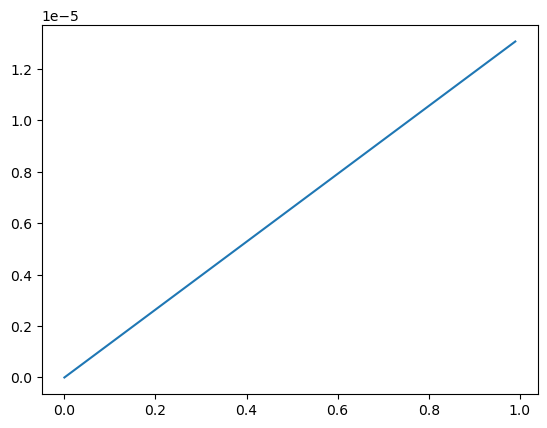

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.arange(0, 1, 0.01), [kick_angle(gain=g) for g in np.arange(0, 1, 0.01)])